# **ch.06 비지도 학습**  
## 06-1 군집 알고리즘  
### 풀어야 할 문제:  
> ### target이 없는 fruits data set에 대해 fruits의 종류별로 classification을 수행하라  
### *타깃을 모르는 비지도 학습*  
unsupervised learning: target 없이 data로부터 learning하는 algorithm으로, target이 없을 때 사용하는 mahine learning algorithm


### *과일 사진 데이터 준비하기*  
fruits data는 사과, 바나나, 파인애플을 담고 있는 흑백 image  
이 data는 numpy array의 기본 저장 format인 npy file로 저장되어 있음


data 준비하기
+ npy file download

In [8]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

wget: command not found


+ import package

In [9]:
import numpy as np
import matplotlib.pyplot as plt

+ load npy file


load() method에 file name 전달

In [10]:
fruits = np.load('fruits_300.npy')

+ fruits array의 shape 확인


1st dim: the number of samples  
2nd dim: height of image  
3rd dim: width of image

In [11]:
print(fruits.shape)

(300, 100, 100)


첫 번째 image의 첫 번째 row 출력

In [12]:
fruits[0, 0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

fruits numpy array는 gray scale의 image를 담고 있으므로 0~255의 integer value를 가짐  


첫 번째 image를 visualization하여 위 output과 비교  
matplotlib의 imshow() function을 사용하여 numpy array로 저장된 image 그리기  
gray scale이므로 cmap parameter를 'gray'로 지정

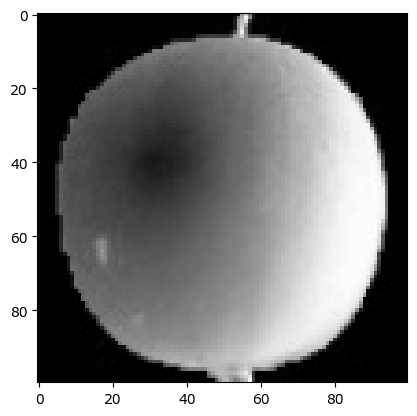

In [13]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

보통 gray scale sample은 background가 밝고 object가 짙은 색임  
그런데 위 그림은 반대  
$\because$ 이 data는 image를 numpy array로 변환할 때 반전시킨 것  
&rarr; 우리의 관심사는 background가 아닌 object, value를 다룰 때 pixel value가 클수록 의미를 부여하기 좋기에 object가 더 높은 value를 갖도록 반전시킨 것


이렇게 반전시킨 data가 다루기 쉬울지는 몰라도, visualization으로는 좋지 않음  


cmap parameter를 'gray_r'로 지정하여 image를 다시 반전시켜 그리기

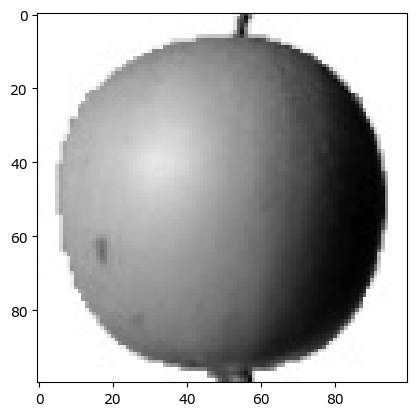

In [15]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

위 image는 사과, 사과 이외의 바나나, 파인애플 image도 visualization  
subplots() function을 사용하면 여러 개의 graph를 array처럼 쌓을 수 있도록 도와줌  
subplots() function에 전달하는 두 parameter는 graph를 쌓을 row와 column을 지정  
axs는 2개의 sub graph를 담고 있는 array임


파인애플, 바나나 그리기

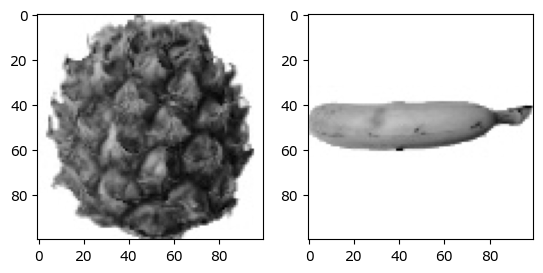

In [19]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

### *픽셀값 분석하기* 
fruits data를 사과, 파인애플, 바나나로 각각 나누기  
array를 나눌 때 100x100 image를 펼쳐 length가 10,000인 1dim array로 만들기  
&rarr; image로 출력하기는 어렵지만, array를 계산하기 쉬움

In [20]:
apple = fruits[:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:].reshape(-1, 100*100)

apple, pineapple, banana array의 shape은 (100, 10000)


apple array의 shape 확인

In [21]:
print(apple.shape)

(100, 10000)


numpy의 mean() method를 사용하여 each array에 담긴 sample의 pixel의 mean 구하기  
axis parameter로 mean을 계산할 축을 지정  
axis=0: row을 따라, axis=1: column을 따라 계산  


지금 필요한 것은 각 sample의 mean이고, sample을 모두 1 dimension으로 나열했으니 axis=1로 지정하여 mean 계산


apple array의 mean() method로 각 smaple의 pixel mean 구하기

In [23]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

histogram을 그려 각 array의 mean이 어떻게 분포되어 있는지 확인  
+ matplotlib의 hist() function 사용  
+ each array에 대한 histogram을 겹쳐서 그리기 위해 alpha parameter를 1보다 작게 하여 투명도 설정  
+ legend() function을 사용하여 어떤 array에 대한 hist인지 범례 만들기

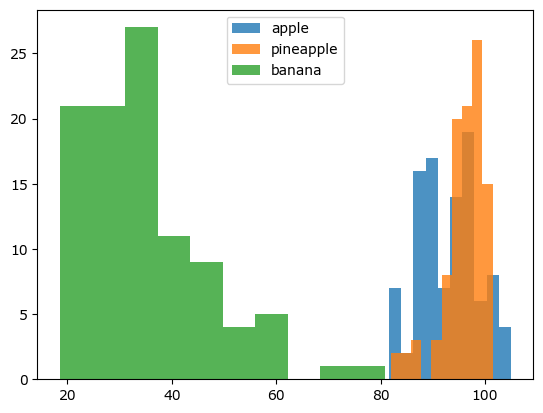

In [25]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple','banana'])
plt.show()

바나나는 구분할 수 있음  
그러나 사과와 파인애플은 구분하기 쉽지 않음  
&rarr; sample의 mean을 구하는 것이 아니라 pixel별 mean을 구하는 것은 어떨까?


entire sample에 대해 each pixel의 mean을 계산  
세 과일은 모양이 다르므로 pixel value가 높은 위치가 조금씩 다를 것


pixel별 mean을 구하는 것은 axis=0으로 지정하여 계산할 수 있음  
matplotlib의 bar() functoin으로 bar graph를 그려 visualization  
subplots() function으로 3개의 sub graph를 만들어 각 과일에 대한 bar graph 그리기

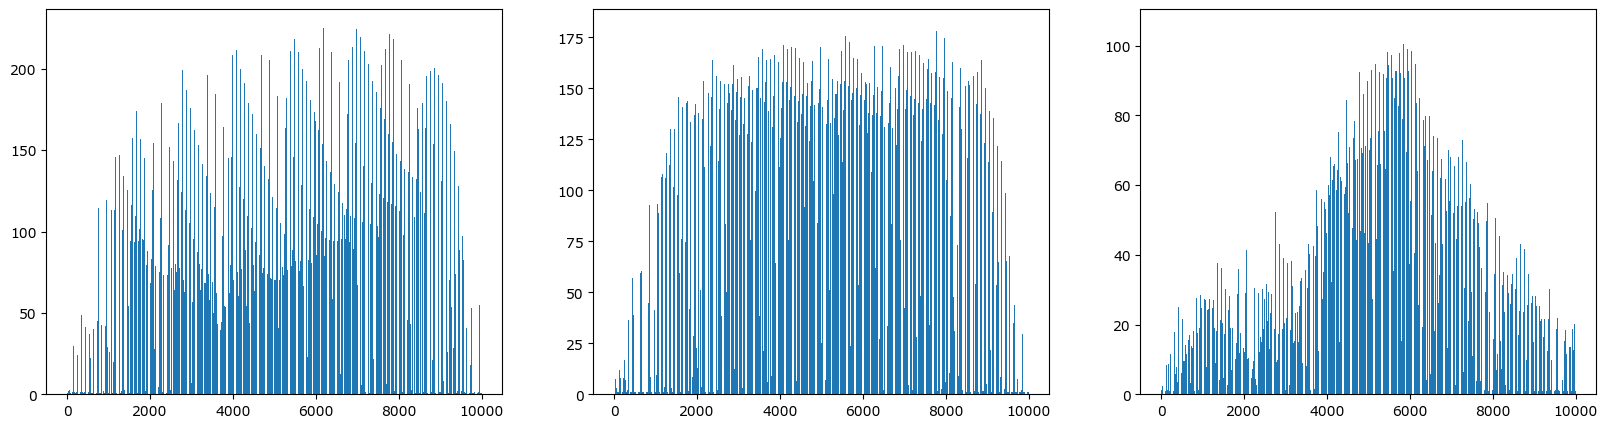

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

pixel mean을 100x100 크기로 바꾸어 image처럼 출력하여 위 graph와 비교하면 더 이해하기 좋음  
이런 image를 모든 image를 합쳐 놓은 representative image로 생각할 수 있음

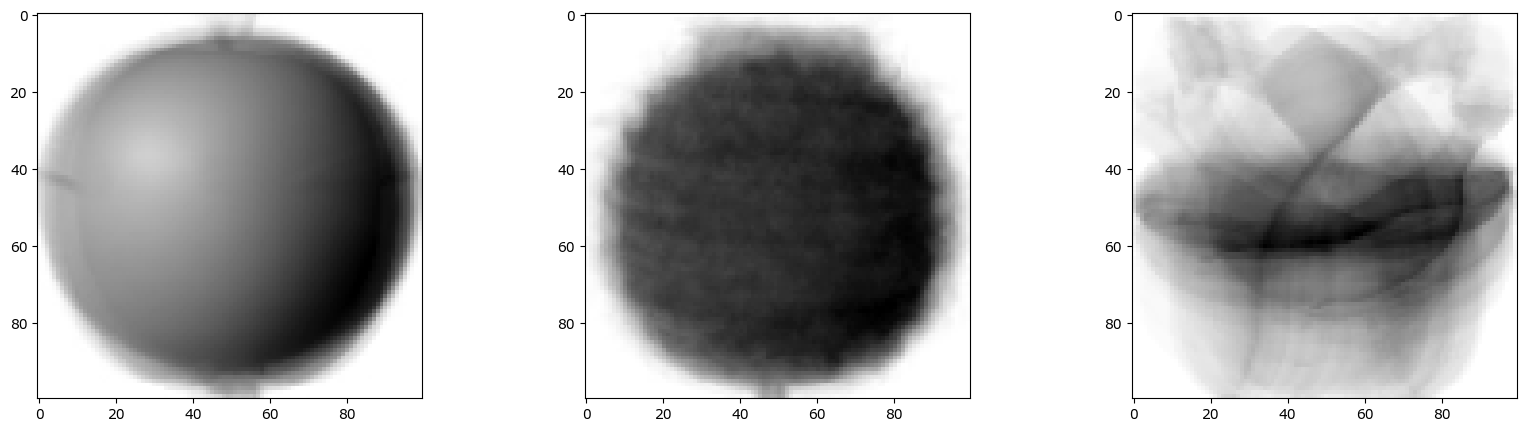

In [31]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

세 과일은 pixel 위치에 따라 value 크기 차이가 남  
이 representative image와 가까운 sample을 골라낸다면 세 과일을 구분할 수 있을 것


### *평균값과 가까운 사진 고르기*  
apple_mean과 가장 가까운 사진 고르기
+ absolute error사용
    + fruits array 안에 있는 entire sample에서 apple_mean을 빼기
    + 계산 한 value의 absolute의 mean 구하기
    
    
absolute calculation에는 numpy abs() function 사용  
abs() function에 array를 입력하면 모든 element의 absolute를 계산하여 입력한 array와 동일한 size의 array를 return


error mean 구하기

In [32]:
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

print(abs_mean.shape)

(300,)


abs_diff는 (300, 100, 100)의 array이고, 각 sample에 대한 mean을 구해야 하므로 두 번째, 세 번째 dimension을 모두 지정하여 mean 구하기


abs_mean에서 value가 작은 순서대로 100개를 골라 apple인지 그려보기  
$\therefore$ fruits data 중, apple_mean과 error가 가장 작은 sample 100개를 고르는 것  
np.argsort() function은 입력한 array의 value에 대해 오름차순으로 정렬한 input array의 index를 return  
np.argsort()가 return한 index 중 처음 100개를 선택해 10x10 격자로 이루어진 graph 그리기

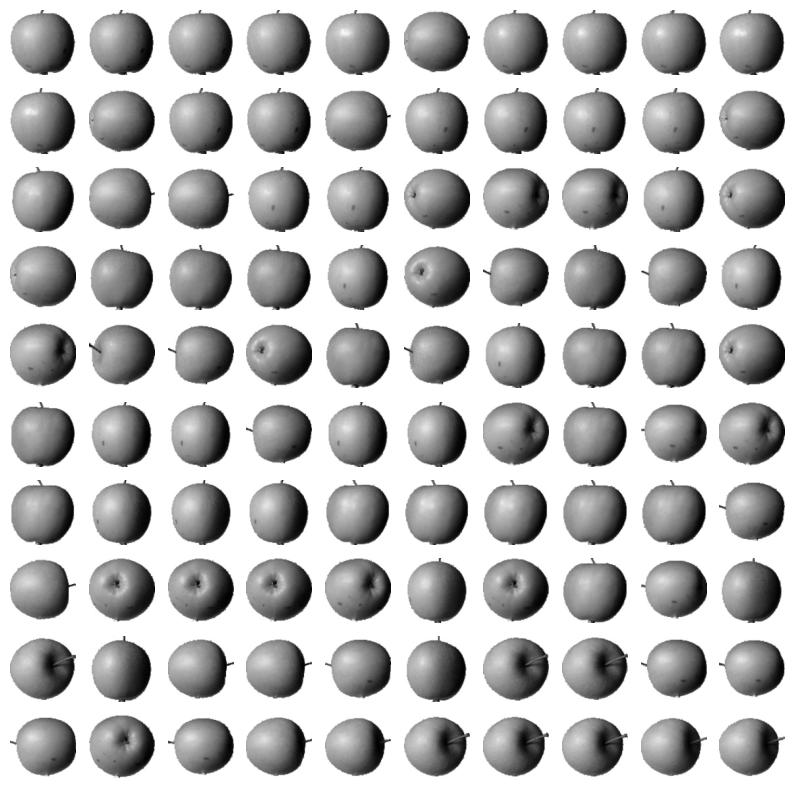

In [34]:
apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off') # 좌표축 생략
    
plt.show()

모든 sample이 사과 &rarr; 성공


clustering: 이렇게 비슷한 sample끼리 group으로 모으는 작업
cluster: clustering algorithm에서 만든 group


이번 예제에서는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었음  
$\therefore$ target을 알고 있었기 때문에 사과, 파인애플, 바나나의 image mean을 계산해 가장 가까운 과일을 찾을 수 있었음  
그러나 실제 unsupervised learning에서는 target을 모르기에 이처럼 sample의 mean을 미리 구할 수 없음